In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm


In [2]:
data_frame = pd.read_csv('framingham.csv')
df = pd.DataFrame(data_frame)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.drop(['education'], axis = 1, inplace = True) 

In [4]:
df.size

63600

In [5]:
df.shape

(4240, 15)

In [6]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.isnull().sum()


male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)
df.shape

(3751, 15)

In [9]:
x= df.loc[:,"TenYearCHD"]
y = df.loc[:,"heartRate" ]

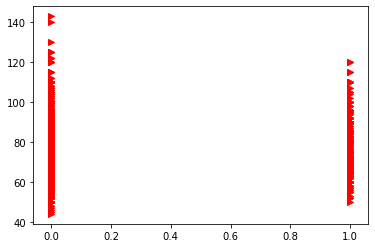

In [10]:
plt.scatter(x, y, marker = '>', c = 'r')

In [11]:
# sns.pairplot(df)

In [12]:
from ipywidgets import widgets

feature_desc={'age':'Age of person',
              'cigsPerDay':'No of average ciggarete taken per day',
              'BPMeds':'BPMeds',
              'prevalentStroke':'prevalentStroke',
              'prevalentHype':'prevalentHype',
             'diabetes':'diabetes',
             'totChol':'Total Cholesterol Value Measured',
             'sysBP':'sysBP',
             'diaBP':'diaBP',
             'BMI':'Body Mass Index',
             'heartRate':'Heart Rate',
             'glucose':'Glucose',
             'TenYearCHD':'Ten Year CHD'}

def hist_feature(column):
    df[column].hist(bins=20,facecolor='midnightblue')
    plt.show()
   


dropdown_menu={v:k for k,v in feature_desc.items()}

widgets.interact(hist_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Age of person': 'age', 'No of average ciggarete…

<function __main__.hist_feature(column)>

## Conclusion of Exploratory Analysis
 <b> Out of 3715 observations over 500 observation (Patient) are at the risk of heart disease. </b>

In [13]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


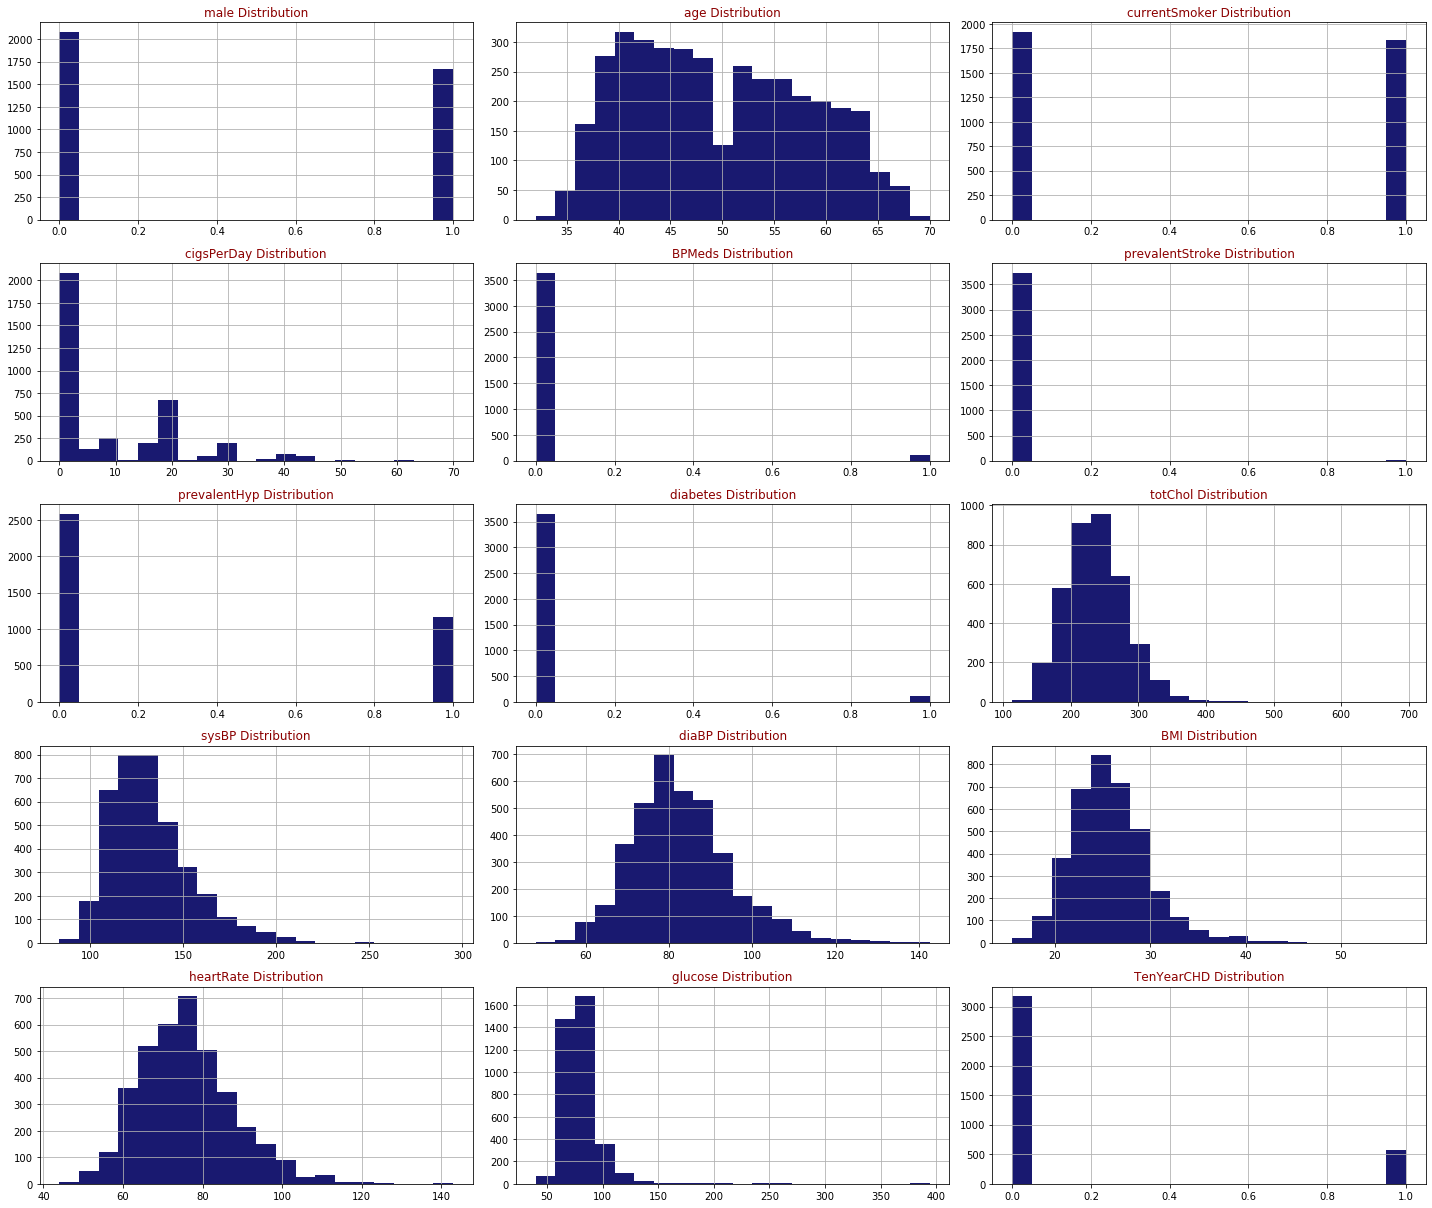

In [14]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [15]:

def plot_feature(column):
    plt.plot(df[column],df['TenYearCHD'],'.')
    plt.xlabel(feature_desc[column])
    plt.ylabel('Ten year CHD')


dropdown_menu={v:k for k,v in feature_desc.items()}

widgets.interact(plot_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Age of person': 'age', 'No of average ciggarete…

<function __main__.plot_feature(column)>

## Logistic Regression ##

In [16]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Why adding a constant column?
It’s because you expect your dependent variable to take a nonzero value when all the otherwise included regressors are set to zero.

Suppose you want to model the wage as a function of years of secondary schooling (in years). You’d estimate an equation of the form

yi=α+xiβ+εi

because one can reasonably expect the wage to take, on average, a positive value even if one’s secondary schooling is null. This value would show up as a constant.

Note however that a constant may take an absurd value while being relevant for the estimation, or may be irrelevant altogether. Suppose further you’re interested in estimating the model above with variables as deviations from their mean.

yi−y¯=(α−α¯)+(xi−x¯)β~+νi

Obviously, the constant equals its average value so that the first term on the right-hand side cancels out. You end up with

yi−y¯=(xi−x¯)β~+νi

that is a model without constant. In practice, including one would probably not be of any concern (for a reasonable amount of observations), but would be theoretically injustified.

Remember that you should always know whether what you estimate makes sense, both from a real and statistical point of view!



In [17]:
cols=df_constant.columns[:-1]
model=sm.Logit(df.TenYearCHD,df_constant[cols])
result=model.fit()
p = result.pvalues
v = round(p,3).nlargest(1)
v

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


diabetes    0.994
dtype: float64

In [18]:
def feature_selection(data_frame, dependent_variable, column_list):
    while len(column_list)>0:
        model = sm.Logit(dependent_variable, data_frame[column_list])
        result = model.fit(disp = 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            column_list = column_list.drop(largest_pvalue.index)
            
result = feature_selection(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                  0.1149
Time:                        05:27:44   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
male           0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [19]:
 from sklearn.linear_model import LogisticRegression

In [20]:
df_constant.TenYearCHD

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

In [21]:
X_components=df_constant.columns[:-1]
X=df_constant[X_components]

y=df_constant.TenYearCHD

X_components

Index(['const', 'male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [22]:
X

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1.0,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,1.0,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1.0,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [23]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

In [24]:
test_train= LogisticRegression(random_state=0).fit(X, y)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
test_train.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
test_train.score(X,y)

0.8499066915489203